In [3]:
!pip install grizli


  Using cached grizli-1.4.0.tar.gz (10.6 MB)
  Created wheel for grizli: filename=grizli-1.4.0-cp39-cp39-win_amd64.whl size=10670767 sha256=48901a7db524cdae00635be3c864c9974ad06461cf782908e27547093f471568
  Stored in directory: c:\users\claus\appdata\local\pip\cache\wheels\f9\f2\a8\1a92314e43b8ebab1343a29164225f9b375d3eaa685c7d1ffe
Successfully built grizli


In [34]:
#!pwd
import sys
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
sys.path.insert(1,'/Users/claus/Documents/jupyter/research/Cosmos2021/')
#from catalog_tools import crossmatch don't need this accorting to Kate G.
from astropy.io import fits

try:
    from grizli import utils
    utils.set_warnings()
    read_catalog = utils.read_catalog
    print('using grizli')
except:
    from astropy.table import Table
    read_catalog = Table.read#
    print('using astropy')

import eazy
print(eazy.__version__)

import os

using grizli
0.5.2


In [30]:
sys.path
eazy.__file__

'C:\\Users\\claus\\anaconda3\\lib\\site-packages\\eazy\\__init__.py'

In [37]:
#root = 'path_to_files/c2020'
root = '/Users/claus/Documents/jupyter/research/Cosmos2021/c2020'

## set up eazy parameters

In [38]:
#!pwd
params = {}
params['CATALOG_FILE'] = 'COSMOS2020_FARMER_R1_v2.0.reform.fits' # this is the reformed photometry for eazy 

params['MAIN_OUTPUT_FILE'] = 'x.{0}.eazypy'.format(root)

params['Z_MAX'] = 12
params['Z_STEP'] = 0.005

params['PRIOR_ABZP'] = 23.9
params['PRIOR_FILTER'] = 259

params['MW_EBV'] = 0.017
params['CAT_HAS_EXTCORR'] = False

params['TEMPLATES_FILE'] = 'templates/xspline_templates/corr_sfhz_13.param'

params['MAIN_OUTPUT_FILE'] = 'Farmerv2.0.10.eazypy'

#params['IGM_SCALE_TAU'] = 0.5

params['PRIOR_FILE'] = 'templates/prior_K_TAO.dat'
params['TEMP_ERR_FILE'] = 'templates/template_error_cosmos2020.txt'
params['TEMP_ERR_A2'] = 1.
params['SYS_ERR'] = 0.02

params['FILTERS_RES'] = 'FILTER.RES.latest'
#params['FILTERS_RES'] = '/Users/claus/anaconda3/Lib/site-packages/eazy/data/filters/FILTER.RES.latest'
#params['FILTERS_RES'] = '/Users/claus/Downloads/FILTER.RES.latest'
# params['TEMP_ERR_FILE'] = 'templates/flat_tef.txt'
# params['TEMP_ERR_A2'] = 1.
# params['SYS_ERR'] = 0.0

zpfile = None
zpfile = 'zphot.zeropoint.corr'
if not os.path.exists(zpfile):
    print('does not exist')
    zpfile = None
    
print('zpfile: ', zpfile)

load_products = False
translate_file = 'cosmos2020_farmer.translate'
#translate_file = 'cosmos2020_farmer_new.translate'
#translate_file = 'farmer_v051120.full.zphot.translate'
#translate_file = 'test.zphot.translate'
self = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_file, zeropoint_file=zpfile, 
                          params=params, load_prior=True, load_products=load_products)





zpfile:  zphot.zeropoint.corr
Read default param file: C:\Users\claus\anaconda3\lib\site-packages\eazy\data/zphot.param.default
Read CATALOG_FILE: COSMOS2020_FARMER_R1_v2.0.reform.fits
   >>> NOBJ = 964506


IndexError: index 1 is out of bounds for axis 0 with size 0

In [21]:
if 'ID' in self.cat.colnames:
    self.cat.rename_column('ID','id')

NameError: name 'self' is not defined

## Apply spatial offsets

In [6]:
# Apply spatial offsets
#root_offsets = 'path_to_file/Cosmos2021'
root_offsets = '/Users/kate/Data/COSMOS2020_Final/Cosmos2021/'
import glob, os

xycols=('ALPHA_J2000','DELTA_J2000')
xycols = ('ra', 'dec')

if 'C2020/classic_v1.5' in root_offsets:
    files = glob.glob('aperNovErr.*eazypy*_00[123].npy')    
elif 'farmer_v051120' in root_offsets:
    files = glob.glob('farmerNovErr.*eazypy*FLUX_00[123].npy')
elif 'Cosmos2021' in root_offsets:
    files = glob.glob(root_offsets+'iK.Farmerv2.0.eazypy_*_FLUX.npy')
    print('spatial offsets applied')
    
files.sort()

for file in files:
    
    filename = os.path.basename(file)
    band = '_'.join(filename.split('_')[1:-1])+'_FLUX'
    if band not in self.flux_columns:
        print('not found')
        continue

    _x, ret = np.load(file, allow_pickle=True)
    i, col_i, f_name, msum, min_sn = _x
    if col_i not in self.flux_columns:
        print('Skip ', file)
        continue

    ifilt = self.flux_columns.index(col_i)
    print(file, ifilt, col_i, msum)
    self.apply_spatial_offset(ifilt, ret, xycols=xycols)
    print('spatial offsets applied')

#del(self.spatial_offset)
#self.spatial_offset = None

spatial offsets applied
/Users/kate/Data/COSMOS2020_Final/Cosmos2021/iK.Farmerv2.0.eazypy_CFHT_u_FLUX.npy 1 CFHT_u_FLUX 133275
Set sys_err = 0.02 (positive=True)
spatial offsets applied
/Users/kate/Data/COSMOS2020_Final/Cosmos2021/iK.Farmerv2.0.eazypy_CFHT_ustar_FLUX.npy 0 CFHT_ustar_FLUX 143610
Set sys_err = 0.02 (positive=True)
spatial offsets applied
/Users/kate/Data/COSMOS2020_Final/Cosmos2021/iK.Farmerv2.0.eazypy_HSC_g_FLUX.npy 2 HSC_g_FLUX 163074
Set sys_err = 0.02 (positive=True)
spatial offsets applied
/Users/kate/Data/COSMOS2020_Final/Cosmos2021/iK.Farmerv2.0.eazypy_HSC_i_FLUX.npy 4 HSC_i_FLUX 170266
Set sys_err = 0.02 (positive=True)
spatial offsets applied
/Users/kate/Data/COSMOS2020_Final/Cosmos2021/iK.Farmerv2.0.eazypy_HSC_r_FLUX.npy 3 HSC_r_FLUX 167709
Set sys_err = 0.02 (positive=True)
spatial offsets applied
/Users/kate/Data/COSMOS2020_Final/Cosmos2021/iK.Farmerv2.0.eazypy_HSC_y_FLUX.npy 6 HSC_y_FLUX 168798
Set sys_err = 0.02 (positive=True)
spatial offsets applied
/Use

## Read in zphot and official catalog 

In [39]:
# do star selection here but just best fit templates, not on morphologies 

zoutf = read_catalog('COSMOS2020_FARMER_R1_v2.1.zout.fits')
officialf = read_catalog('COSMOS2020_FARMER_R1_v2.1.hdf5') #not the right combination, just trying some stuff out!!!!!

cat = zoutf
official = officialf

UnicodeDecodeError: 'charmap' codec can't decode byte 0x90 in position 1954: character maps to <undefined>

## suggested star galaxy separation - write your own if you prefer! 

In [19]:
# save output 
# Chi-squared from stellar and galaxy template fits
# nnu = official['nusefilt'][has_hst]-1
# xnu = official['nusefilt']-1

galaxy_chinu = official['ez_z_phot_chi2'] / (official['ez_nusefilt'] - 1)
stellar_chinu = official['ez_star_min_chi2'] / (official['ez_nusefilt'] - 1)


# orig
keep = (official['HSC_i_MAG'] < 22) & (galaxy_chinu < 25) #& (zout['z_spec'] > 0)
# update
keep = (official['HSC_i_MAG'] < 23) & (galaxy_chinu < 100) #& (official['z_spec'] > 0)
ss = official['ez_z_phot']>4.
plt.figure(figsize=(7,10))
plt.scatter(galaxy_chinu[keep], stellar_chinu[keep], 
           color='0.8', alpha=0.1)

#sc = plt.scatter(galaxy_chinu[fsel], stellar_chinu[fsel], 
#            c=official['star_teff'][fsel], vmin=2000, vmax=5000, alpha=0.2, cmap='jet_r')

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

#sel = official['lp_type']==1
sc = plt.scatter(galaxy_chinu[keep], stellar_chinu[keep], 
            c=official['ez_star_teff'][keep], vmin=2000, vmax=5000, alpha=0.2, cmap='jet_r')

#sc = plt.scatter(galaxy_chinu[~keep], stellar_chinu[~keep], 
            #alpha=0.01, c='blue',s=5)
#ax.set_xlim(0.1, 100)
#ax.set_ylim(0.5,50)

plt.ylabel(r'$\chi^2_\nu$, star')


xsep = [0.001, 0.1, 1,      5,   15, 25, 30, 40, 2000*10]
ysep = [0.001, 0.1, 1*0.8, 5*0.8, 25, 30, 35, 100, 200000*10]

yline = np.interp(galaxy_chinu, xsep, ysep)
IS_STAR = (galaxy_chinu > 0) & (stellar_chinu < yline) & (official['HSC_i_MAG'] < 25) & (official['ez_z_phot'] > 0) #(probs a star)
IS_STAR |= (stellar_chinu < 8) & (official['ez_z_phot'] <= 0) #if eazy didnt fit but has good star chi, its a star (probs) 

IS_STAR |= (galaxy_chinu > 0) & (stellar_chinu*2 < yline) & (official['HSC_i_MAG'] > 25) & (official['ez_star_teff'] < 4000)
# clump of z~6 galaxies probs t dwarfs 
#IS_STAR &= official['star_teff'] < 6000
# ?????? 

dy_star = (stellar_chinu/yline)
delta_chi_star = (stellar_chinu - galaxy_chinu)*(official['ez_nusefilt'] - 1)

cb = plt.colorbar(sc)
cb.set_label('star_teff')


plt.loglog()
plt.xlim(0.1, 100)
plt.ylim(0.5,500)
    #ax.plot(ax.get_xlim(), ax.get_xlim(), color='r')
plt.xlabel(r'$\chi^2_\nu$, galaxy')
plt.grid()
plt.plot(xsep, ysep, color='r')
    
# cb = plt.colorbar(sc, shrink=0.5)
# cb.set_label(f'FLUX_RADIUS, {filt} 50mas pix')
# plt.grid()

#fig.tight_layout(pad=0.5)

#is_star = (official['z_phot_chi2'] > official['star_min_chi2']) & (np.log10(official['star_teff']) < 3.62)
print('stars: ', IS_STAR.sum(), len(IS_STAR))

# add flags for minimum filter requirements:
# all HSC, UVISTA AND IRAC FILTERS REQUIRED AT A MINIMUM


# make not star flag 

print(sum(IS_STAR>0.))

official['STAR_FLAG'] = IS_STAR

KeyError: 'ez_z_phot_chi2'

## make a sample and plot it's seds and uvj diagram 

In [9]:
def sep_line(vj):
    if vj<0.75:
        uv = 1.3
    if vj>0.75:
        uv = 0.8*(vj)+0.7
    if vj>1.5:
        uv = 0.
    return uv

def uvj(cat,save=False):

    labels = { 'z' :r'$z_{phot}$', 
         'mass' : r'Stellar mass [$M_{\odot}$]',
         'ssfr': r'sSFR [$yr^{-1}$] (past 100Myr)',
          'sfr': r'SFR [$M_{\odot}yr^{-1}$]',
         'fsize': 20}


    plt.figure(figsize=(7,6))
    sc = plt.scatter(cat['vj'],cat['uv'],\
                    c=cat['ssfr'],cmap='RdYlBu',\
                s=5, alpha=0.9)
    cb = plt.colorbar(sc)
    cb.set_label(labels['ssfr'])

    plt.xlabel('V-J',fontsize=labels['fsize'])
    plt.ylabel('U-V',fontsize=labels['fsize'])

    plt.grid(alpha=0.7)

    plt.xlim(-0.5,3)
    plt.ylim(-0.5,3)

    vj = np.arange(-1,1.6,0.1)
    uv = [sep_line(v) for v in vj]
    plt.vlines(x=1.5, ymin=1.9,ymax = 3,color='black')

    plt.plot(vj,uv,c='black')
    
    if save:
        plt.savefig('uvj-test.pdf')

In [10]:
cat = official


cat['uv'] = -2.5*np.log10(cat['ez_restU']/cat['ez_restV'])
cat['vj'] = -2.5*np.log10(cat['ez_restV']/cat['ez_restJ'])
cat['uv_err'] = 2.5*np.log(10.)*np.sqrt((cat['ez_restU_err']/cat['ez_restU'])**2.+(cat['ez_restV_err']/cat['ez_restV'])**2.)
cat['vj_err'] = 2.5*np.log(10.)*np.sqrt((cat['ez_restV_err']/cat['ez_restV'])**2.+(cat['ez_restJ_err']/cat['ez_restJ'])**2.)

cat['ssfr'] = cat['ez_sfr']-(cat['ez_mass'])

def sel_uvj(g):
    "returns True for things which are uvj selected"
    sel = ((g['uv'])>(0.8*(g['vj']))+0.7) & ((g['uv'])>1.3) & ((g['vj'])<1.5)
    #sel = np.where(np.isnan(g['uv']), sel, np.nan)
    return sel


In [11]:
# select 3<z<6 massive in c2020 and compare to zfourge: 
# FARMER


mcut = 11.5
zlo = 0.5
zhi = 1.

fsel = (cat['ez_z_phot']>zlo) \
        & (cat['ez_z_phot']<zhi)  \
    & (cat['STAR_FLAG']==0) & \
    (cat['FLAG_COMBINED']==0) \
    & (cat['ez_mass']>mcut) & \
    (cat['UVISTA_Ks_MAG']<25.) \
    & ((cat['ez_z_phot_chi2']/cat['ez_nusefilt'])<20.) & (cat['ez_mass']<12)



qsel = fsel&sel_uvj(cat)


print(f'{zlo}<z<{zhi} log(m*)>{mcut} sources in farmer:', np.sum(fsel))
print('And', np.sum(qsel), 'are in the UVJ quiescent region')

0.5<z<1.0 log(m*)>11.5 sources in farmer: 96
And 45 are in the UVJ quiescent region


In [12]:
self.fit_catalog(idx=qsel)

100%|██████████| 511/511 [00:00<00:00, 839.49it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=48)
Fit 15.3 s (n_proc=4, NOBJ=48)


/Users/kate/anaconda3/envs/grizli-dev/lib/python3.6/site-packages/eazy/photoz.py:2595: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


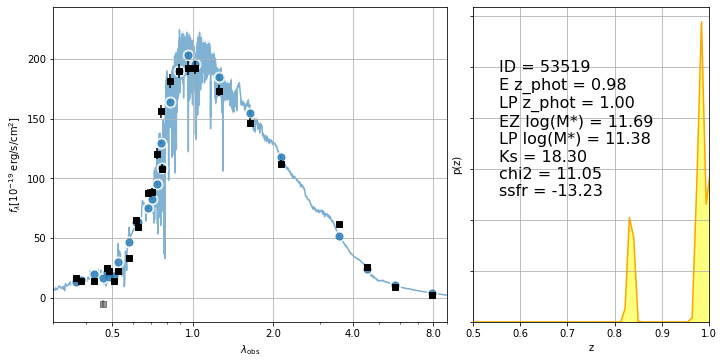

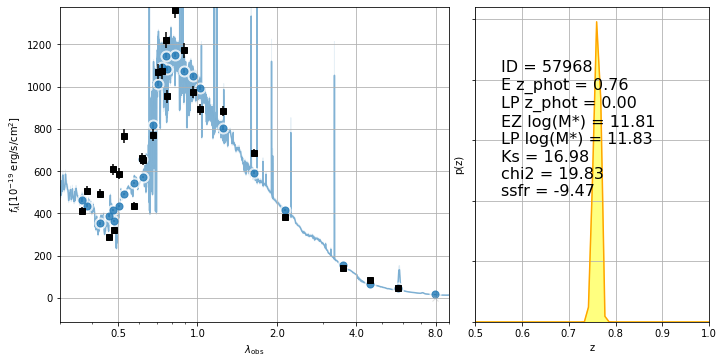

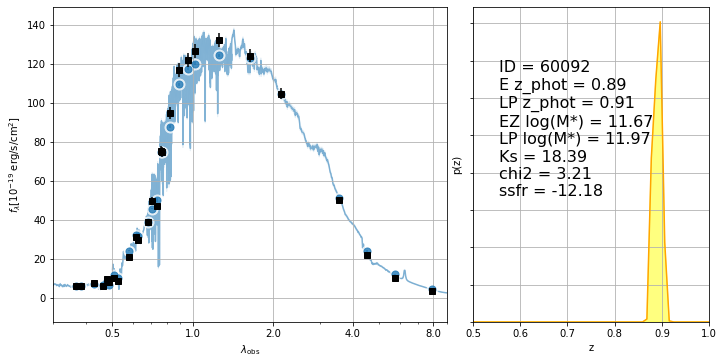

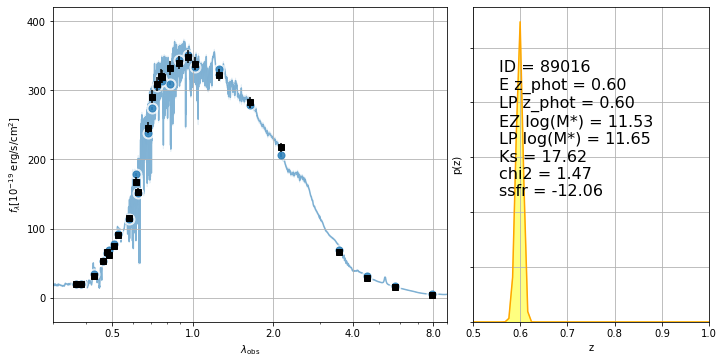

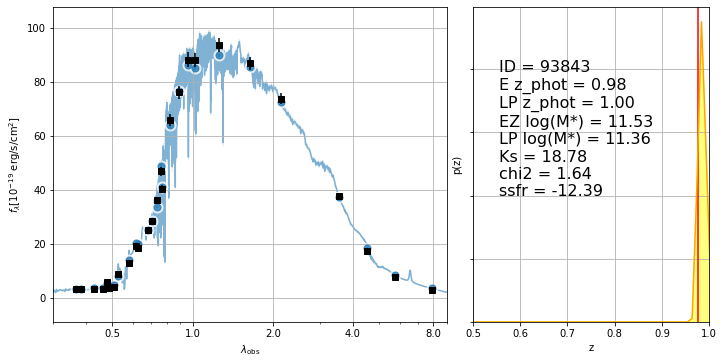

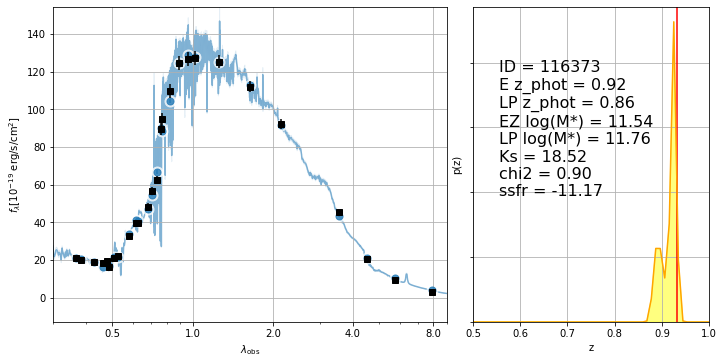

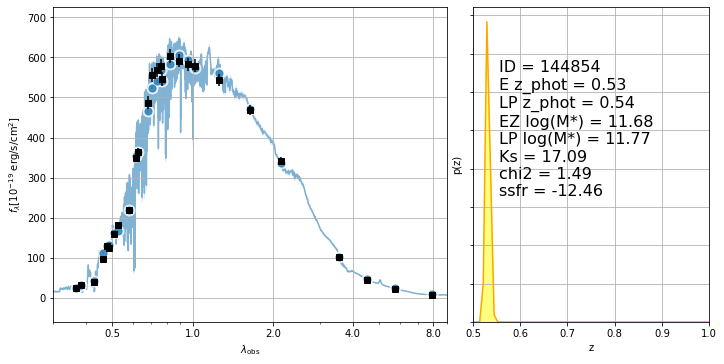

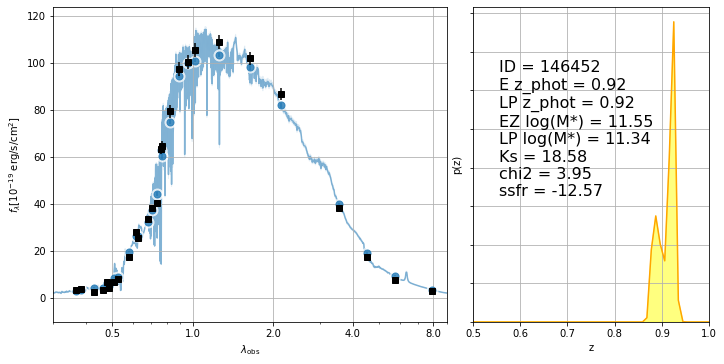

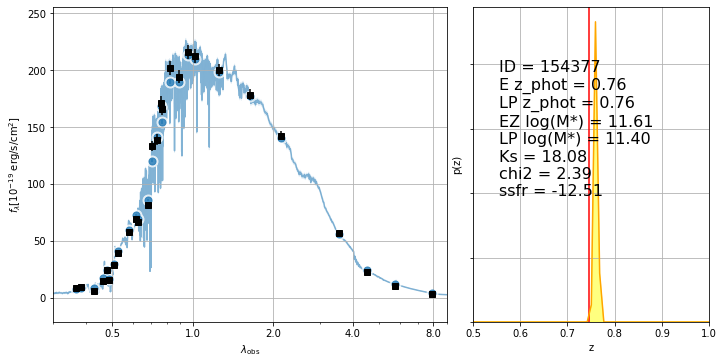

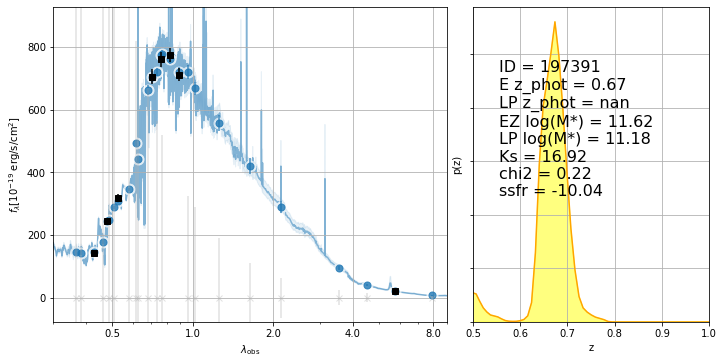

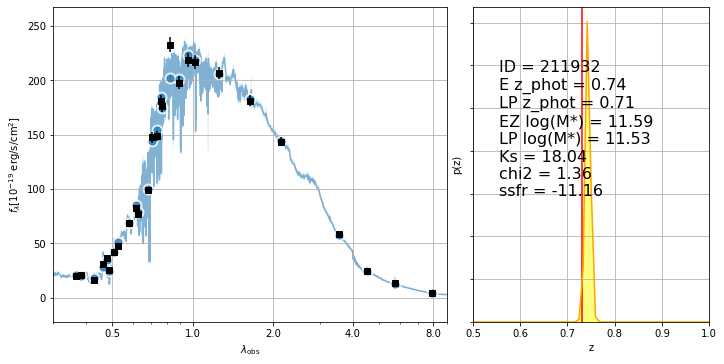

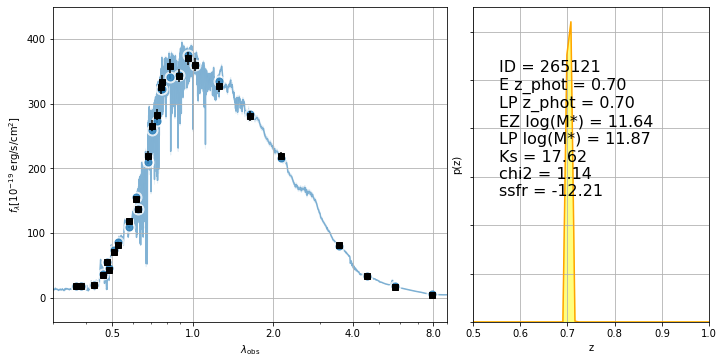

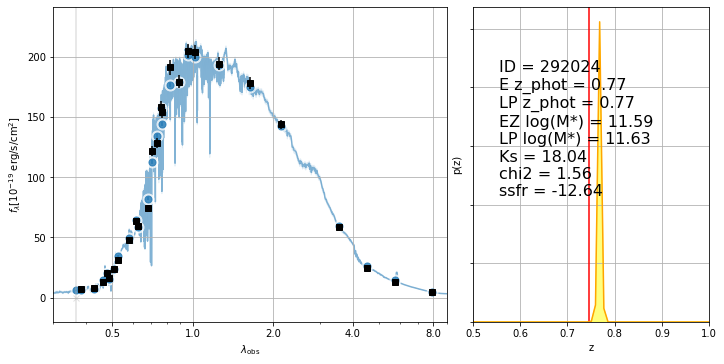

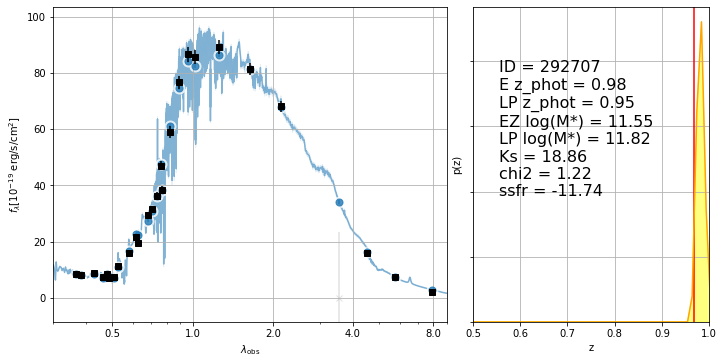

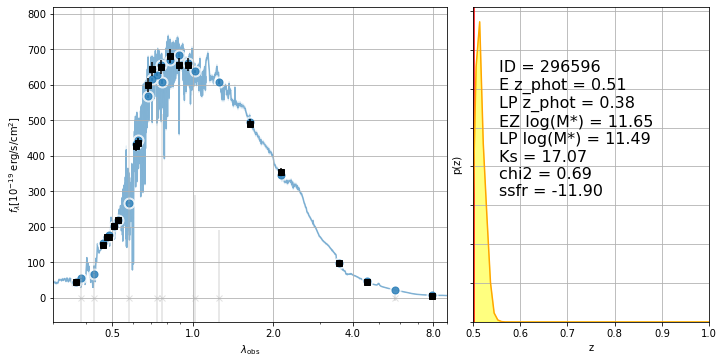

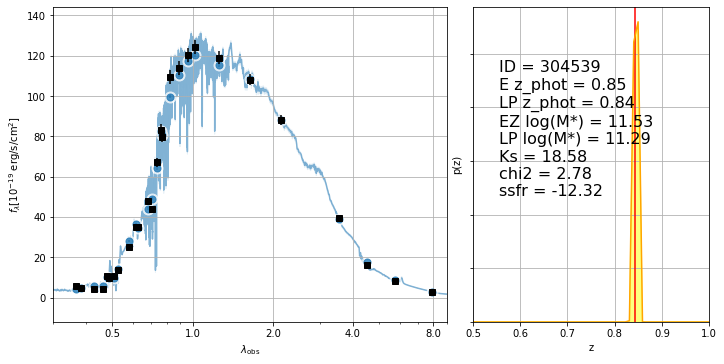

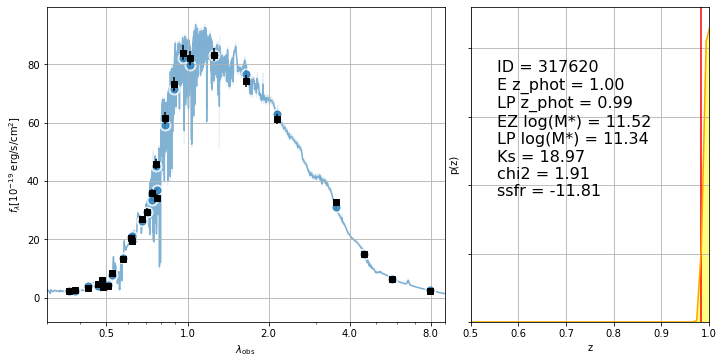

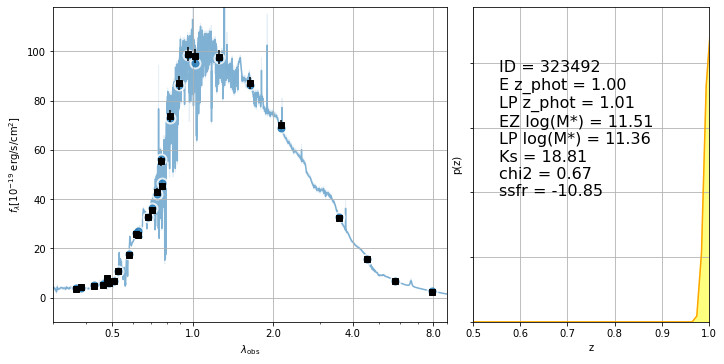

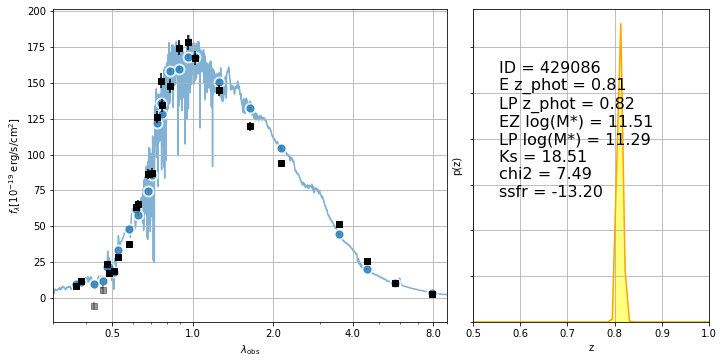

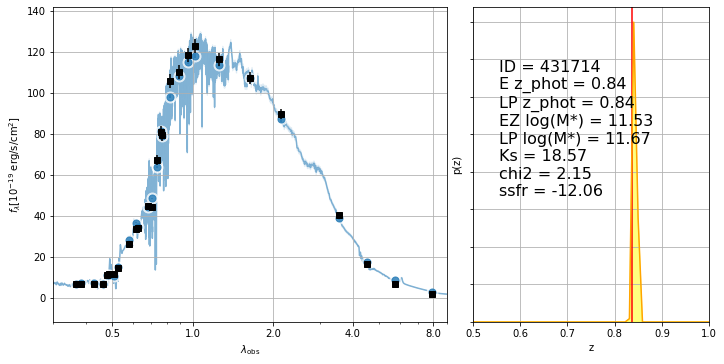

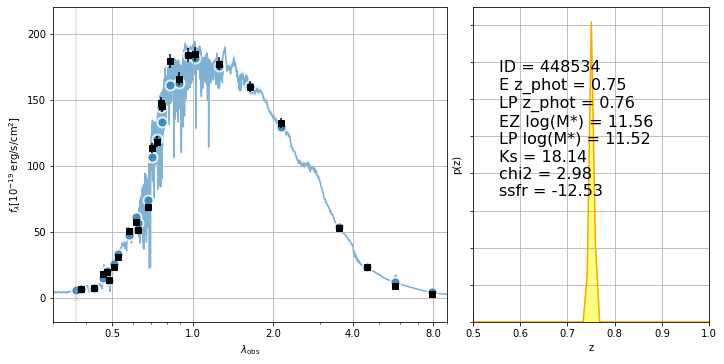

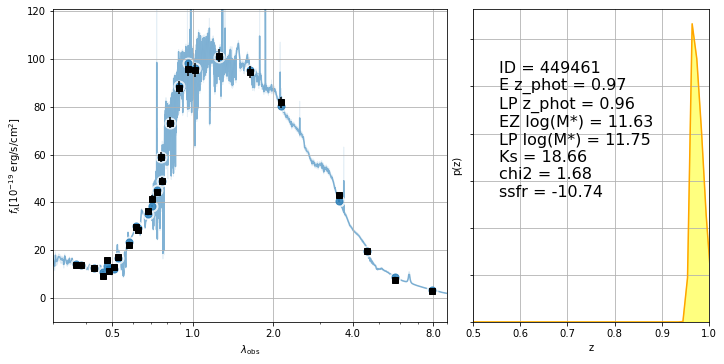

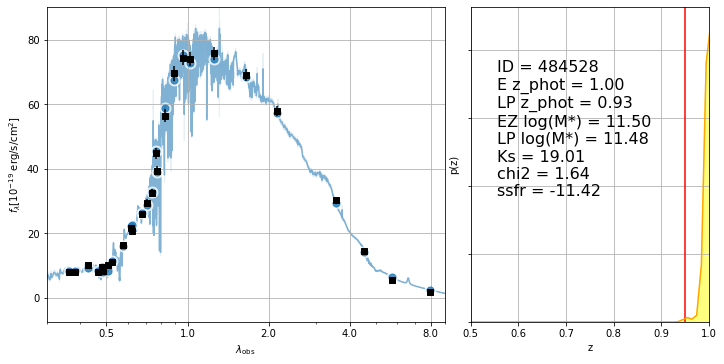

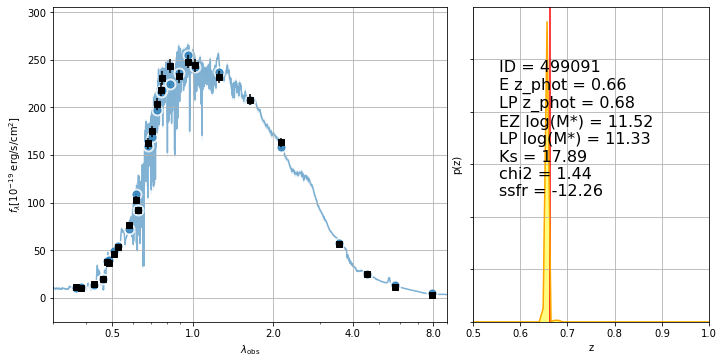

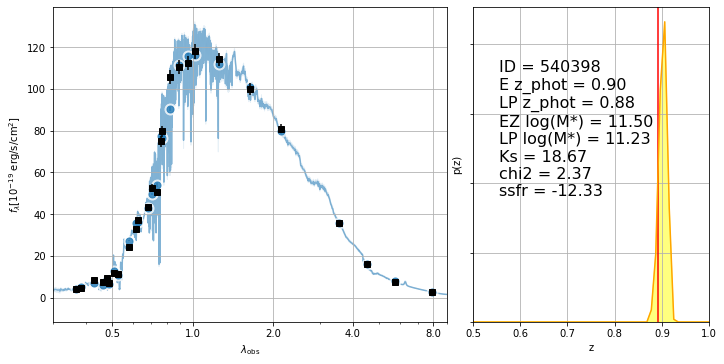

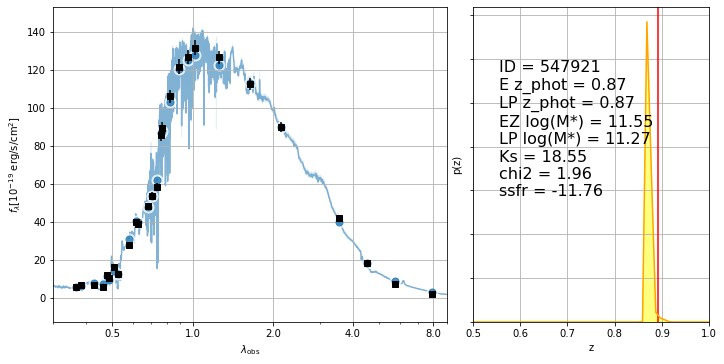

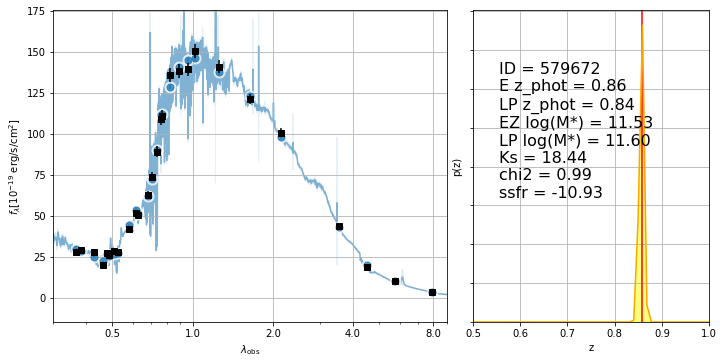

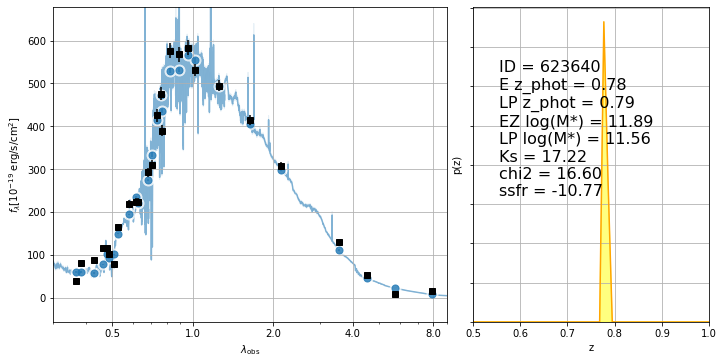

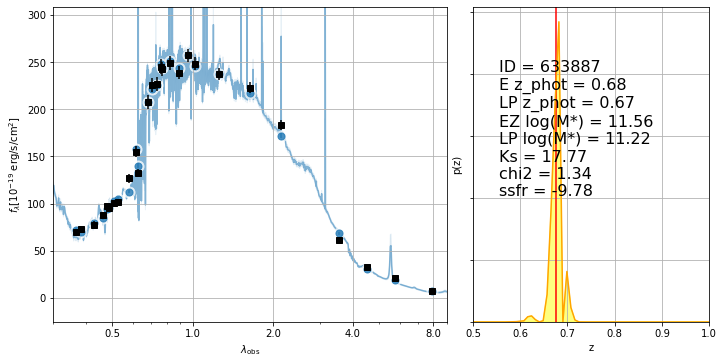

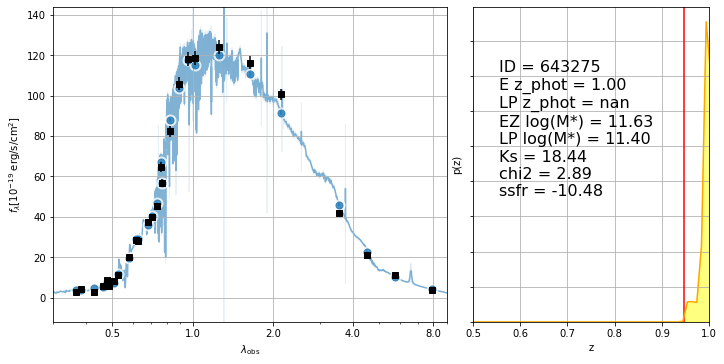

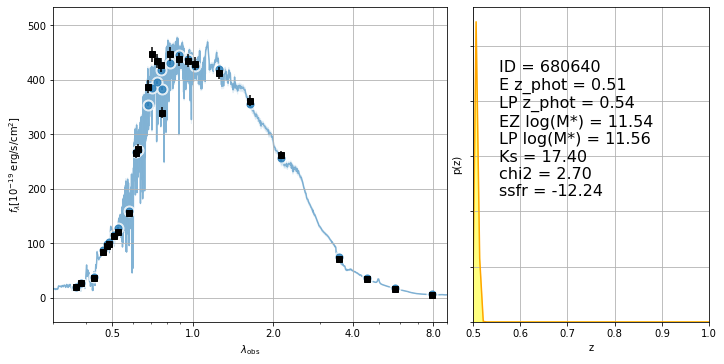

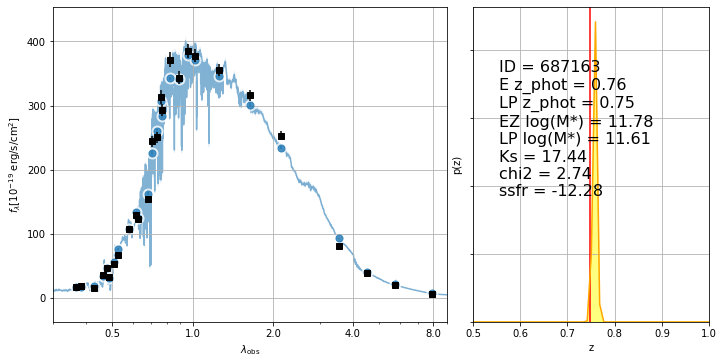

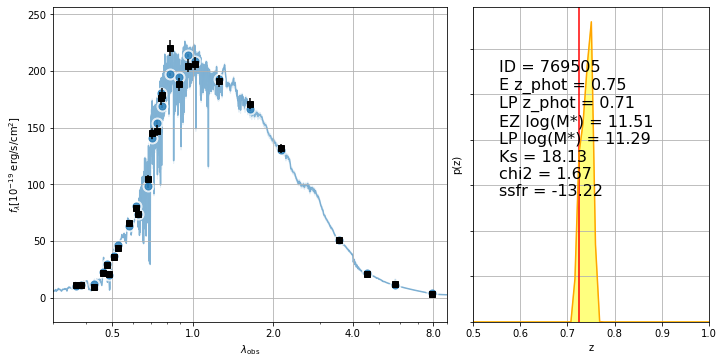

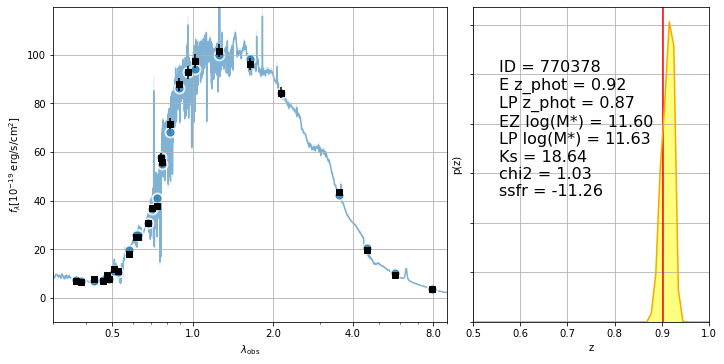

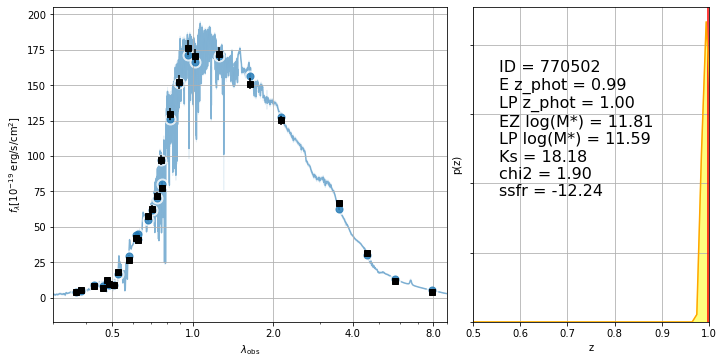

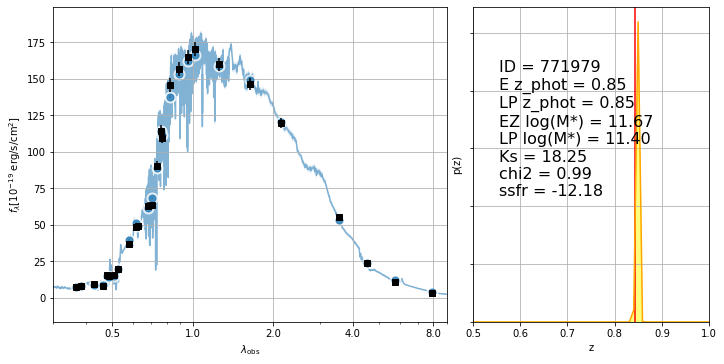

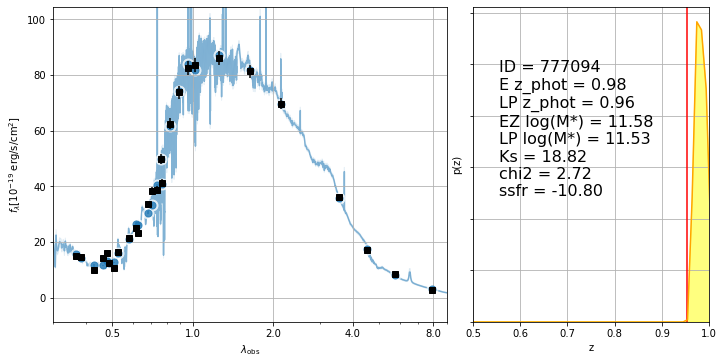

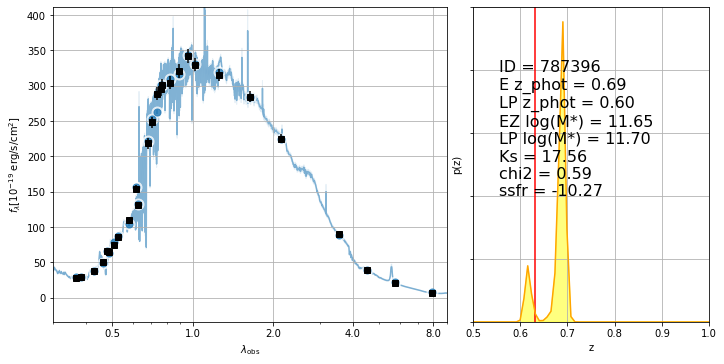

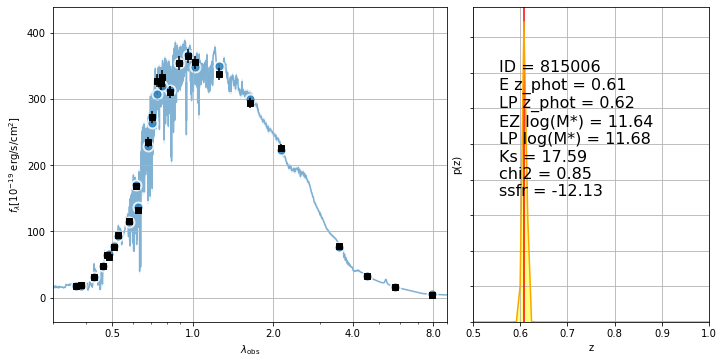

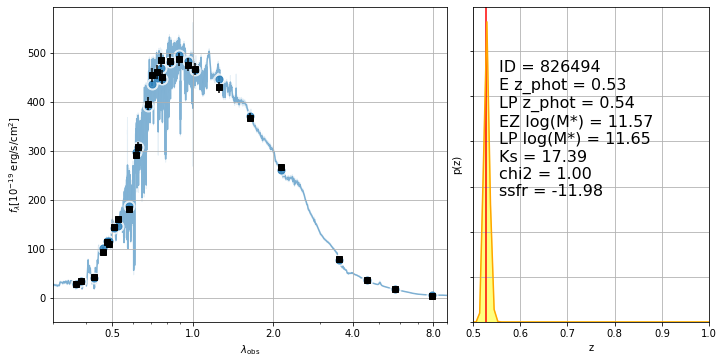

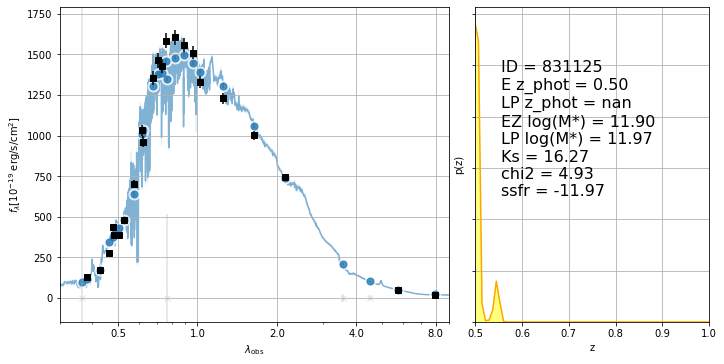

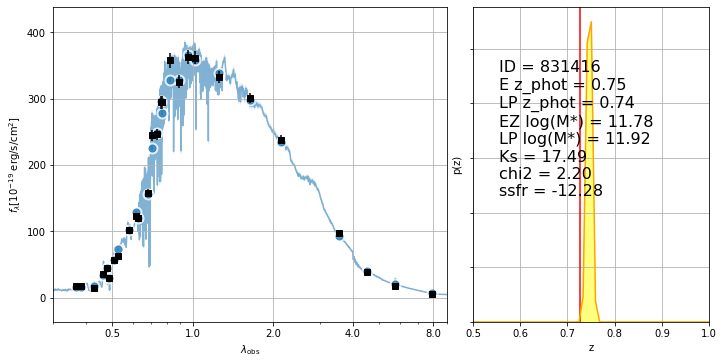

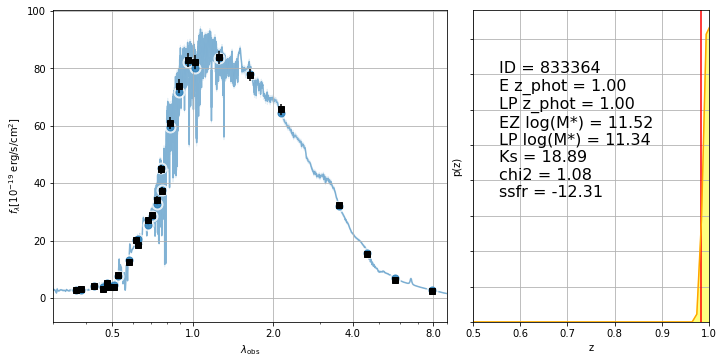

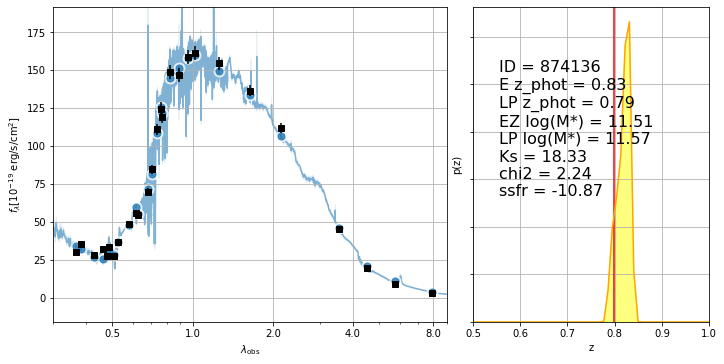

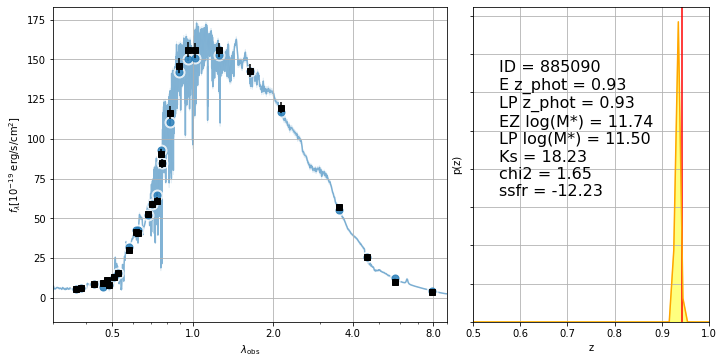

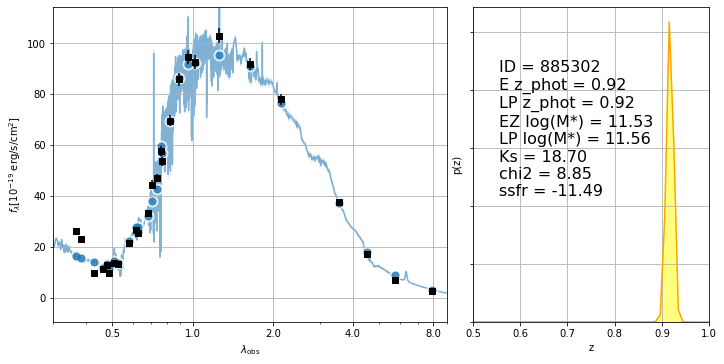

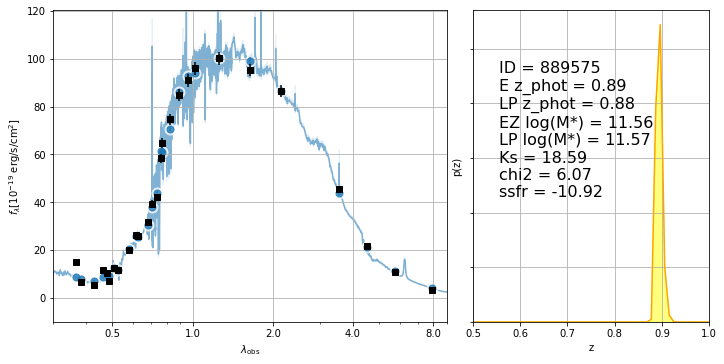

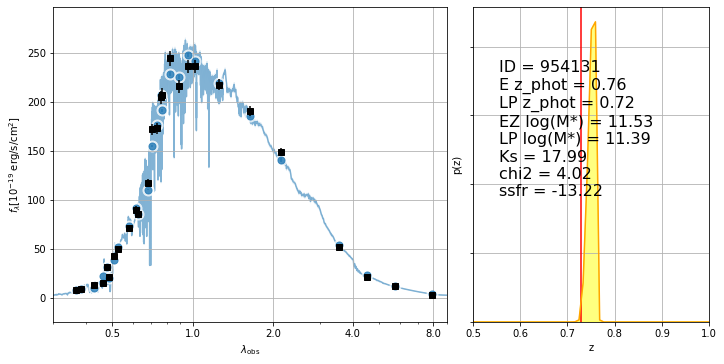

In [13]:
#np.array([711641,]))

ids = cat[qsel]['ID']
kmag = cat[qsel]['UVISTA_Ks_MAG']
zs = cat[qsel]['ez_z_phot']
ezm = cat[qsel]['ez_mass']
lpz = cat[qsel]['lp_zBEST']
lpm = cat[qsel]['lp_mass_best']
chi = cat[qsel]['ez_z_phot_chi2']/cat[qsel]['ez_nusefilt']
ssfr = cat[qsel]['ssfr']

for ii,z,m,z2,m2,k,c,c0 in zip(ids,zs,ezm,lpz,lpm,kmag,chi,ssfr):
    _ = self.show_fit(ii,show_fnu=False,zr=(zlo,zhi),figsize=(10,5),show_components=False,add_label=False)
    fig = plt.gcf()
    ax = fig.axes[1]
    ax2 = fig.axes[0]
    #ax2.set_ylim(0,5)
    
    plt.text(x = 0.11, y = .4, \
           s = f'ID = {ii}'
            '\n'                                                        
            f'E z_phot = {z:.2f}'
            '\n'
            f'LP z_phot = {z2:.2f}'
            '\n'
            f'EZ log(M*) = {m:.2f}'
           '\n'
            f'LP log(M*) = {m2:.2f}'
           '\n'
           f'Ks = {k:.2f}'
            '\n'
           f'chi2 = {c:.2f}'
            '\n'
           f'ssfr = {c0:.2f}',fontsize=16,
           transform=ax.transAxes)

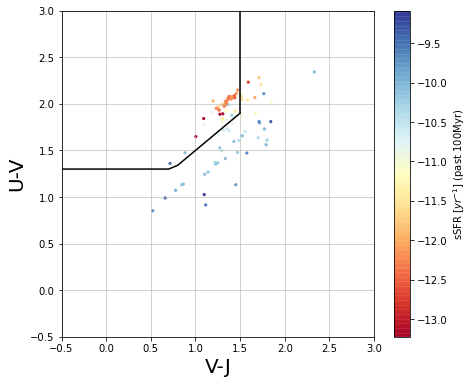

In [14]:
uvj(cat[fsel])